# Drug Recommendation using Machine Learning 

### By Soorya Parthiban

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the libraries

In [6]:
drug_df = pd.read_csv(r"D:\001_Data\Completed\Python Projects\02_Drug Prediction - End2End\drug200.csv")

In [8]:
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.36,drugY
1,47,M,LOW,HIGH,13.09,drugC
2,47,M,LOW,HIGH,10.11,drugC
3,28,F,NORMAL,HIGH,7.80,drugX
4,61,F,LOW,HIGH,18.04,drugY


In [9]:
drug_df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.57,drugC
196,16,M,LOW,HIGH,12.01,drugC
197,52,M,NORMAL,HIGH,9.89,drugX
198,23,M,NORMAL,NORMAL,14.02,drugX
199,40,F,LOW,NORMAL,11.35,drugX


In [10]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [11]:
drug_df.describe()

,Age,Na_to_K
count,200.00,200.00
mean,44.31,16.08
std,16.54,7.22
min,15.00,6.27
25%,31.00,10.45
50%,45.00,13.94
75%,58.00,19.38
max,74.00,38.25


### Data Pre-Processing

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
drug_df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [14]:
drug_df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [15]:
drug_df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

#### Label Encoding Sex and Cholesterol columns

In [62]:
drug_df['Sex'] = LabelEncoder().fit_transform(drug_df['Sex'])
drug_df['Cholesterol'] = LabelEncoder().fit_transform(drug_df['Cholesterol'])

In [65]:
drug_df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [66]:
drug_df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [17]:
drug_df['Sex'].value_counts()

1    104
0     96
Name: Sex, dtype: int64

In [18]:
drug_df['Cholesterol'].value_counts()

0    103
1     97
Name: Cholesterol, dtype: int64

#### Creating dummy variables in BP column

In [20]:
dummy_BP = pd.get_dummies(drug_df["BP"], prefix="BP", prefix_sep="_")

In [22]:
dummy_BP.head()

,BP_HIGH,BP_LOW,BP_NORMAL
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [23]:
dummy_BP.drop("BP_NORMAL", axis=1, inplace=True)

In [24]:
dummy_BP.head()

,BP_HIGH,BP_LOW
0,1,0
1,0,1
2,0,1
3,0,0
4,0,1


#### Concating BP dummies to orginal dataset

In [25]:
drug_df.drop("BP", axis=1, inplace=True)

In [26]:
drug_df = pd.concat([drug_df, dummy_BP], axis=1)

In [27]:
drug_df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_HIGH,BP_LOW
0,23,0,0,25.36,drugY,1,0
1,47,1,0,13.09,drugC,0,1
2,47,1,0,10.11,drugC,0,1
3,28,0,0,7.80,drugX,0,0
4,61,0,0,18.04,drugY,0,1


### Data Visualization

Text(0, 0.5, 'Count')

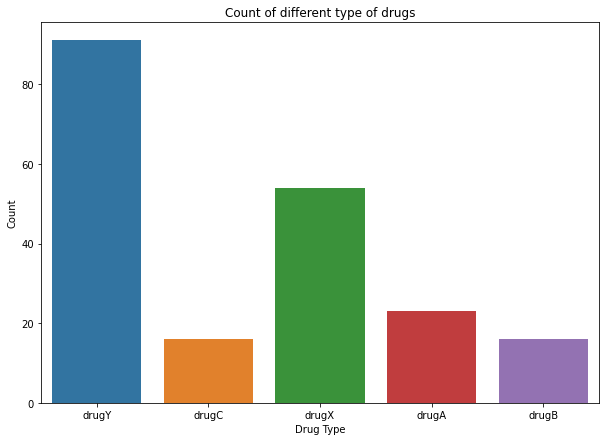

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(drug_df["Drug"])
plt.title("Count of different type of drugs")
plt.xlabel("Drug Type")
plt.ylabel("Count")

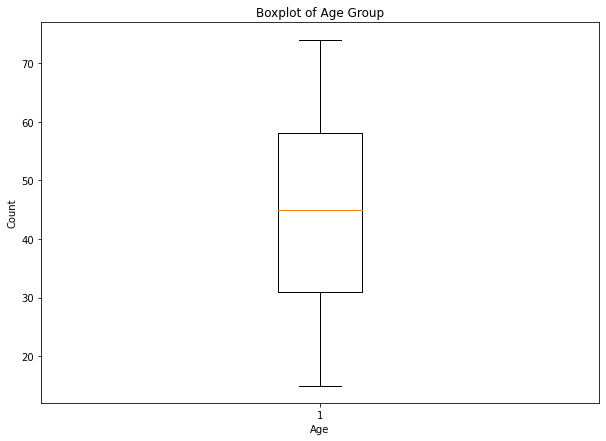

In [32]:
plt.figure(figsize=(10,7))
plt.boxplot(drug_df["Age"])
plt.title("Boxplot of Age Group")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

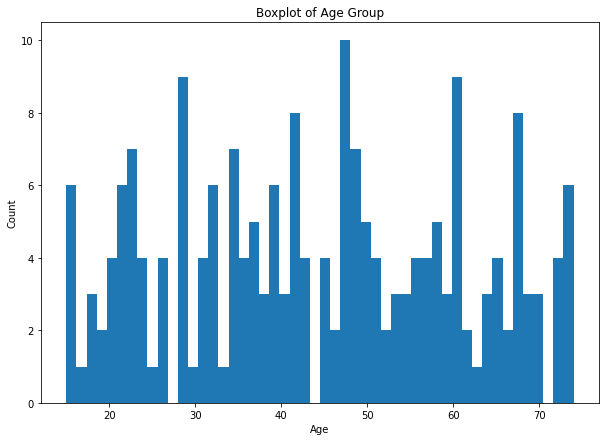

In [36]:
plt.figure(figsize=(10,7))
plt.hist(drug_df["Age"], bins=50)
plt.title("Boxplot of Age Group")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

### Using LazyPredict to choose the best model

In [50]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
X = drug_df.drop("Drug", axis=1)
y = drug_df["Drug"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3)

In [43]:
print(X_train.shape, X_test.shape)

(140, 6) (60, 6)


In [44]:
print(y_train.shape, y_test.shape)

(140,) (60,)


In [45]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:00<00:00, 33.91it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
SVC                                0.97               0.99    None      0.97   
LogisticRegression                 0.97               0.99    None      0.97   
LinearSVC                          0.97               0.99    None      0.97   
XGBClassifier                      0.98               0.96    None      0.98   
LabelPropagation                   0.90               0.96    None      0.90   
LabelSpreading                     0.90               0.96    None      0.90   
LinearDiscriminantAnalysis         0.90 

### Building ML Models

#### LGBM Classifier Model

In [47]:
from lightgbm import LGBMClassifier

In [51]:
lgbm_clf = LGBMClassifier(n_estimators=500)

In [52]:
lgbm_clf.fit(X_train, y_train)

LGBMClassifier(n_estimators=500)

In [53]:
y_preds_lgbm = lgbm_clf.predict(X_test)

In [61]:
print(accuracy_score(y_test, y_preds_lgbm))

1.0


Text(0.5, 1.0, 'Confusion Matrix for LGBM Classifier Model')

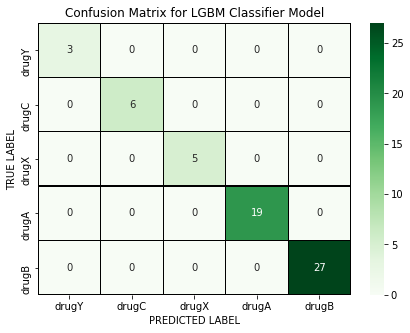

In [67]:
cm = confusion_matrix(y_test, y_preds_lgbm)

x_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
y_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LGBM Classifier Model')

#### Bagging Classifier Model 

In [56]:
from sklearn.ensemble import BaggingClassifier

In [57]:
bg_clf = BaggingClassifier(n_estimators=500)

In [58]:
bg_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=500)

In [59]:
y_preds_bg = bg_clf.predict(X_test)

In [60]:
print(accuracy_score(y_test, y_preds_bg))

1.0


Text(0.5, 1.0, 'Confusion Matrix for Bagging Classifier Model')

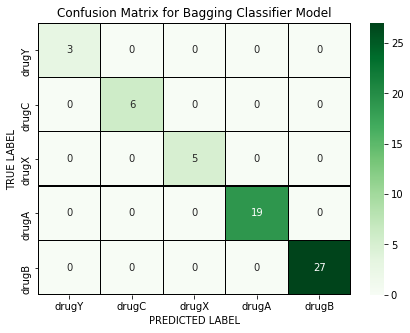

In [68]:
cm = confusion_matrix(y_test, y_preds_bg)

x_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
y_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier Model')

#### Decision Tree Model

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt_clf = DecisionTreeClassifier()

In [71]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
y_preds_dt = dt_clf.predict(X_test)

In [73]:
print(accuracy_score(y_test, y_preds_dt))

1.0


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier Model')

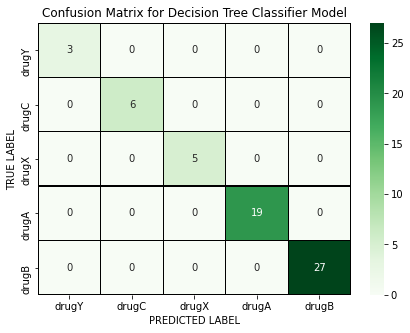

In [74]:
cm = confusion_matrix(y_test, y_preds_dt)

x_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
y_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier Model')

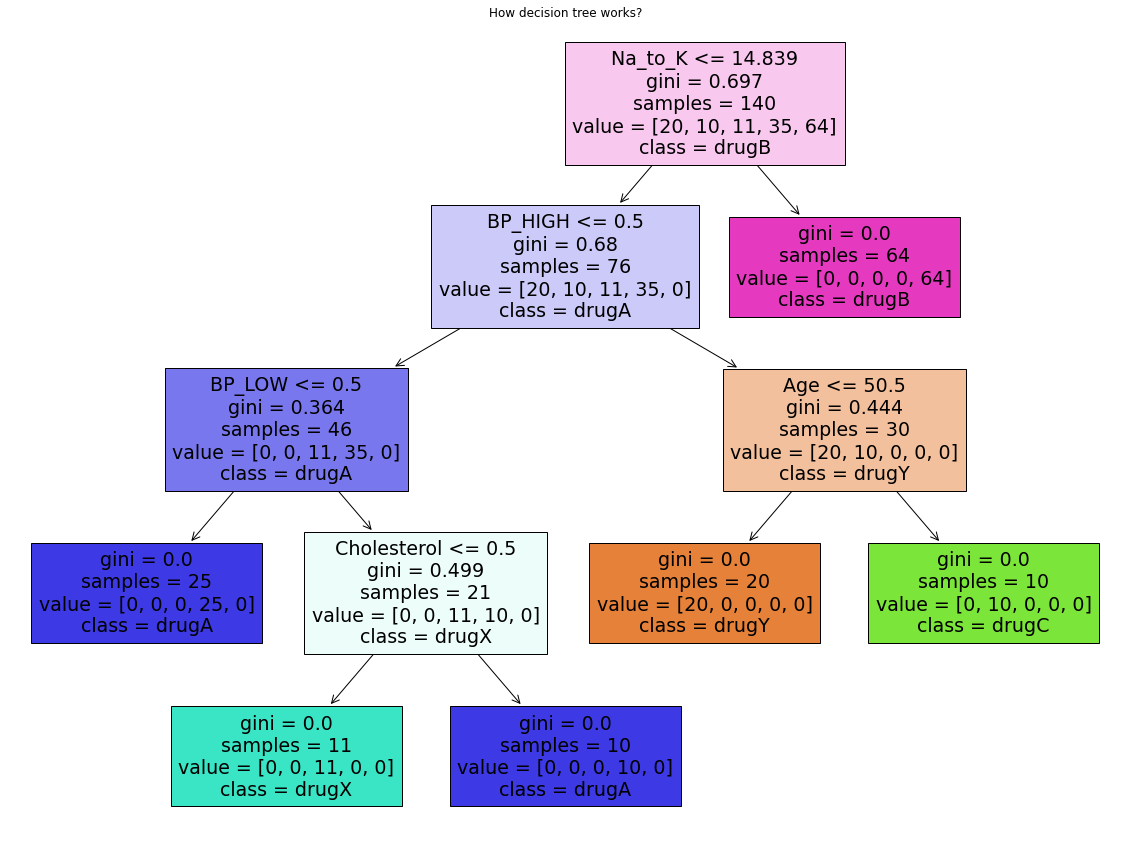

In [76]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt_clf, feature_names = list(X), class_names = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], filled = True)
plt.title('How decision tree works?')
plt.show()

### Saving the best model

In [77]:
from joblib import dump
MODEL_NAME = "drug-recommender.pkl"
dump(lgbm_clf, MODEL_NAME)

['drug-recommender.pkl']

### THE END